In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score







In [2]:
x,y=load_iris(return_X_y=True)

In [3]:
iris=load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
x=pd.DataFrame(x,columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'])

In [8]:
x 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

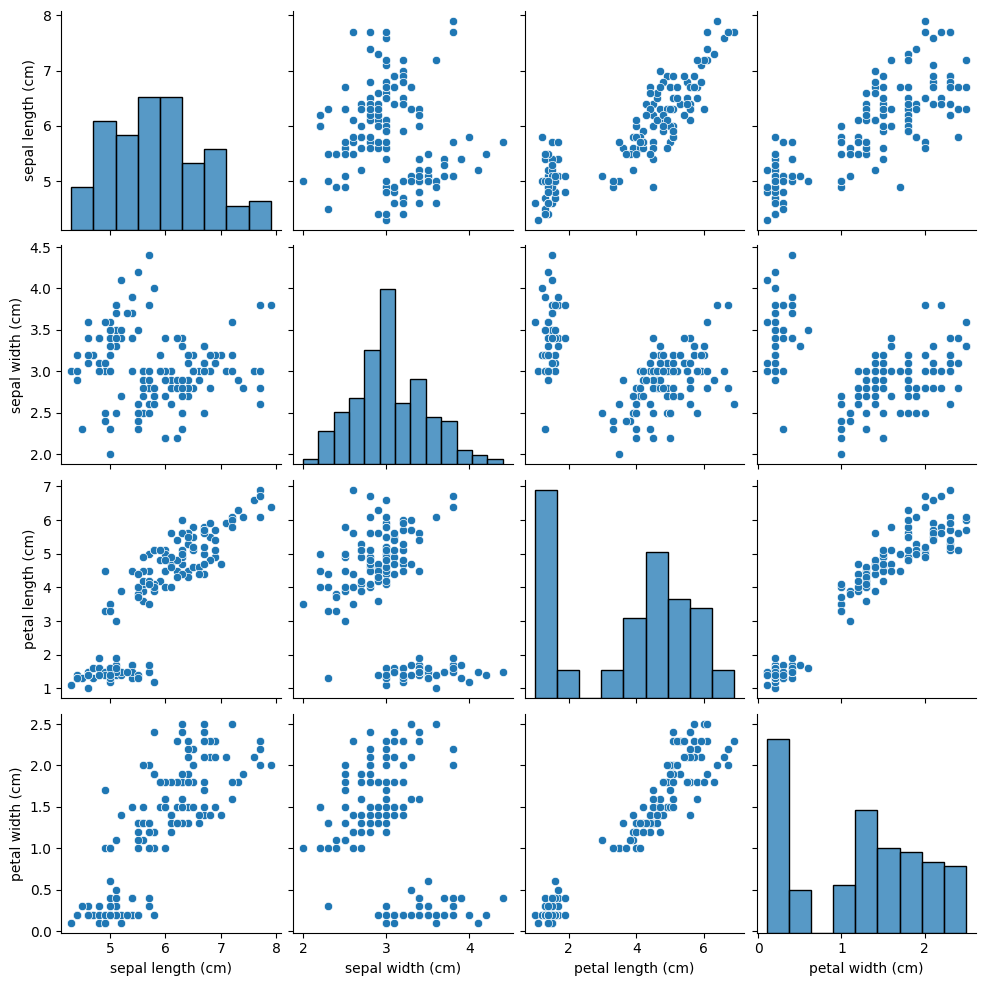

In [10]:
sns.pairplot(x)

In [11]:
y=pd.DataFrame(y,columns=['species'])
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
x.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)

In [13]:
df_concat=pd.concat([x,y],ignore_index=False,axis=1)
df_concat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
df_concat=df_concat[df_concat['species']!=0]
df_concat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df_concat_new=df_concat[['sepal length (cm)','sepal width (cm)','species']]
df_concat_new 

,sepal length (cm),sepal width (cm),species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [16]:
df_concat_new =df_concat_new.reset_index()

In [17]:
df_concat_new.drop(columns=['index'],inplace=True)

In [18]:
df_concat_new

,sepal length (cm),sepal width (cm),species
0,7.0,3.2,1
1,6.4,3.2,1
2,6.9,3.1,1
3,5.5,2.3,1
4,6.5,2.8,1
...,...,...,...
95,6.7,3.0,2
96,6.3,2.5,2
97,6.5,3.0,2
98,6.2,3.4,2


In [19]:
x_new=df_concat_new.iloc[:,:-1]
y_new=df_concat_new.iloc[:,-1]

In [20]:
x_new

,sepal length (cm),sepal width (cm)
0,7.0,3.2
1,6.4,3.2
2,6.9,3.1
3,5.5,2.3
4,6.5,2.8
...,...,...
95,6.7,3.0
96,6.3,2.5
97,6.5,3.0
98,6.2,3.4


In [21]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [22]:
estimators=[('lr',clf1),('rf',clf2),('knn',clf3)]

In [23]:
for estimator in estimators:
    v=cross_val_score(estimator[1],x_new,y_new,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(v),2))

lr 0.75
rf 0.62
knn 0.62


# Applying Hard Voting 

In [24]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,n_jobs=-1,voting='hard')
r1=cross_val_score(vc,x_new,y_new,cv=10,scoring='accuracy')
print(np.round(np.mean(r1),2))

0.67


# Applying Soft Voting 

In [25]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,n_jobs=-1,voting='soft')
r2=cross_val_score(vc,x_new,y_new,cv=10,scoring='accuracy')
print(np.round(np.mean(r2),2))

0.64


# Applying Weights 

In [26]:
for i in range (1,4): 
    for j in range(1,4):
        for k in range(1,4): 
            vc=VotingClassifier(estimators=estimators,n_jobs=-1,voting='soft',weights=[i,j,k])
            r2=cross_val_score(vc,x_new,y_new,cv=10,scoring='accuracy')
            print(f'i={i},j={j},k={k}\t',np.round(np.mean(r2),2))

i=1,j=1,k=1	 0.64
i=1,j=1,k=2	 0.65
i=1,j=1,k=3	 0.66
i=1,j=2,k=1	 0.63
i=1,j=2,k=2	 0.64
i=1,j=2,k=3	 0.63
i=1,j=3,k=1	 0.61
i=1,j=3,k=2	 0.64
i=1,j=3,k=3	 0.63
i=2,j=1,k=1	 0.67
i=2,j=1,k=2	 0.66
i=2,j=1,k=3	 0.66
i=2,j=2,k=1	 0.65
i=2,j=2,k=2	 0.64
i=2,j=2,k=3	 0.64
i=2,j=3,k=1	 0.63
i=2,j=3,k=2	 0.65
i=2,j=3,k=3	 0.64
i=3,j=1,k=1	 0.71
i=3,j=1,k=2	 0.69
i=3,j=1,k=3	 0.71
i=3,j=2,k=1	 0.67
i=3,j=2,k=2	 0.65
i=3,j=2,k=3	 0.66
i=3,j=3,k=1	 0.65
i=3,j=3,k=2	 0.64
i=3,j=3,k=3	 0.66
